In [34]:
#import numpy as np
from autograd.util import flatten_func
from autograd import grad as compute_grad   
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import linear_model
from sklearn.cluster import KMeans
import math
import autograd.numpy as np
import custom_utilities as util

get_ipython().run_line_magic('matplotlib', 'inline')

In [35]:
csv = open('final_project_data/final_project_point_cloud.fuse', 'r')
data=[]
num=0
for line in csv:
    ls=line.split(" ")
    data.append([float(ls[0]),float(ls[1]),float(ls[2]),float(ls[3][:-1])])
    num += 1
csv.close()
data=np.array(data)
#print(data)
print(num)
lat, long, height, i = data.T

430736


In [46]:
sample_pos_norm = normalize(sample_pos[:,1:],sample_pos_means[1:],sample_pos_stds[1:])
sample_pos_norm = np.concatenate((np.ones(len(sample_pos))[:, np.newaxis],sample_pos_norm),axis=1)
#print(sample_pos_norm)
z_norm = sample_pos_norm[:,-1][:,np.newaxis]
#z_norm.shape(len(z_norm,1))
data_norm = sample_pos_norm[:,:-1]

[[-0.00923875]
 [-0.02122652]
 [ 0.00601776]]


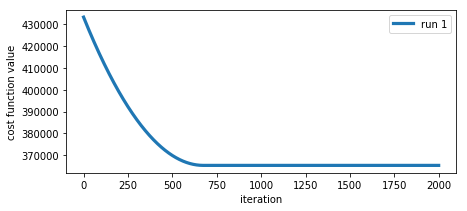

In [75]:
#print(weight_history[-1])
final_w_norm = weight_history[-1]
#threshold numbers
thresholds = (z_norm-np.dot(data_norm,final_w_norm))**2
print(thresholds.shape)
print(thresholds)

In [76]:
data_filtered_z = []
for d in range(len(model)):
    if thresholds[d] < 0.04:
        data_filtered_z.append(model[d])
road_data = np.array(data_filtered_z)

rx, ry, rz, ri = road_data.T

TypeError: object of type 'LinearRegression' has no len()

In [ ]:
plt.hist(z,255)
plt.show()

In [ ]:
plt.hist(i)
plt.show()

In [ ]:
'''
zrange=max(z)-min(z)
med=np.median(z)
print(med)
minimum=np.median(z)-0.005*zrange
maximum=np.median(z)+0.02*zrange
#mean=np.array(z).mean()
#std=np.array(z).std()
road_data=[ ]
k=0
for d in model:
    if d[2]>=minimum and d[2]<=maximum:
        road_data.append(d)
        k=k+1
road_data=np.array(road_data)
rx, ry, rz, ri = road_data.T
counts=plt.hist(rz, 14,color='black',alpha=0.5)
#x=[mean+2*std]*100
#x=np.array(x)
#plt.plot(x)
plt.show()
print(k)
'''

In [ ]:
np.savetxt('c.csv',road_data, delimiter=' ')

In [ ]:
# draw pixel picture
fig=plt.figure()
road=fig.add_subplot(111)
road.plot(rx,ry,',')# draw pixel
plt.show()

original=[]
#intensity
si= sorted(i)[int(0.997*len(i)):int(0.9995*len(i))]
minl=min(si)
maxl=max(si)
print("{} {}".format(minl, maxl))
for e in road_data:
    if e[3]>=minl and e[3]<=maxl:
        original.append(e[:-1])
original= np.array(original)
lx, ly, lz = original.T
plt.savefig('original.png',dpi=400,bbox_inches='tight')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rx, ry, ',')
ax.plot(lx, ly, ',', color='red')
plt.savefig('lane_rough.png',dpi=400,bbox_inches='tight')
plt.show()

#bnear(e,distance=0.3) > 5

In [ ]:
ox=original[:,0][:,np.newaxis]
oy=original[:,1]

model_all=linear_model.LinearRegression()
model_all.fit(ox,oy)

In [ ]:
np.savetxt('d.csv',original, delimiter=' ')

In [ ]:
model_ransac_all=linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac_all.fit(ox,oy)
inlier_mask_all=model_ransac_all.inlier_mask_
outlier_mask_all=np.logical_not(inlier_mask_all)

linex = ox
liney = model_all.predict(ox)
alpha = model_all.coef_
print('para',alpha)
plt.plot(rx, ry, ',')
plt.plot(linex, liney, color='yellow', linestyle='-', linewidth=2, label='lane1')

In [ ]:
ts=[]
for t in original:
    first,second = rot(t[0],t[1],alpha)
    ts.append([first,second])
ts=np.asarray(ts)
ts=ts.reshape(np.shape(ts)[0],2)
print(np.shape(ts))
tx,ty = ts.T

In [ ]:
plt.hist(tx,255)
plt.show()
plt.hist(ty,255)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tx, ty, ',', color='red')

In [ ]:
# In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available)
# But it falls in local minima. That’s why it can be useful to restart it several times.
iteration=500000
# ,random_state=0
data = KMeans(max_iter=iteration,n_clusters=3).fit(ts)
label = data.labels_
lane1,lane2,lane3,lane_other,lane=[],[],[],[],[]
for q in range(len(label)):
    lane=[original[q][0],original[q][1],original[q][2]]
    if (label[q]==0):
        lane1.append(lane)
    elif (label[q]==1):
        lane2.append(lane)
    elif (label[q]==2):
        lane3.append(lane)
    else:
        lane_other.append(lane)
        
lane1=np.array(lane1)
if(len(lane1)!=0):
    x1,y1,z1=lane1.T
# print(x1.shape,x1)
X1=lane1[:,0][:,np.newaxis]
#X2=list(lane1)
Y1=lane1[:,1]
#print(X1)
#print(x1)
# x1_1=[]
# for element in x1:
#     x1_1.append(element)


lane2=np.array(lane2)

if(len(lane2)!=0):
    x2,y2,z2=lane2.T
X2=lane2[:,0][:,np.newaxis]
Y2=lane2[:,1]
lane3=np.array(lane3)

if(len(lane3)!=0):
    x3,y3,z3=lane3.T
X3=lane3[:,0][:,np.newaxis]
Y3=lane3[:,1]
print(X1.shape,Y1.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rx, ry, ',')
ax.plot(X3, Y3, ',', color='red')
plt.savefig('lane_rough.png',dpi=400,bbox_inches='tight')
plt.show()
# In[25]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rx, ry, ',')
ax.plot(X2, Y2, ',', color='red')
plt.savefig('lane_rough.png',dpi=400,bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rx, ry, ',')
ax.plot(X1, Y1, ',', color='red')
plt.savefig('lane_rough.png',dpi=400,bbox_inches='tight')
plt.show()

ox=original[:,0][:,np.newaxis]
oy=original[:,1]


In [ ]:
model_ransac_all=linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac_all.fit(ox,oy)
inlier_mask_all=model_ransac_all.inlier_mask_
outlier_mask_all=np.logical_not(inlier_mask_all)

linex = ox
liney = model_all.predict(ox)
alpha = model_all.coef_
print('para',alpha)
plt.plot(rx, ry, ',')
plt.plot(linex, liney, color='yellow', linestyle='-', linewidth=2, label='lane1')

In [ ]:
model=linear_model.LinearRegression()
model.fit(X1,Y1)
model2=linear_model.LinearRegression()
model3=linear_model.LinearRegression()
model2.fit(X2,Y2)
model3.fit(X3,Y3)
model_all=linear_model.LinearRegression()
model_all.fit(ox,oy)

model_ransac=linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X1,Y1)
inlier_mask=model_ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

model_ransac2=linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac2.fit(X2,Y2)
inlier_mask2=model_ransac2.inlier_mask_
outlier_mask2=np.logical_not(inlier_mask2)

model_ransac3=linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac3.fit(X3,Y3)
inlier_mask3=model_ransac3.inlier_mask_
outlier_mask3=np.logical_not(inlier_mask3)


line_X=X1
line_y=model.predict(X1)
line_y_ransac=model_ransac.predict(X1)

line_X2=X2
line_y2=model2.predict(X2)
line_y_ransac2=model_ransac2.predict(X2)

line_X3=X3
line_y=model3.predict(X3)
line_y_ransac3=model_ransac3.predict(X3)

plt.plot(rx, ry, ',')




plt.plot(line_X, line_y_ransac, color='yellow', linestyle='-', linewidth=2, label='lane1')
plt.plot(line_X2, line_y_ransac2, color='red', linestyle='-',linewidth=2, label='lane2')
plt.plot(line_X3, line_y_ransac3, color='green', linestyle='-',linewidth=2, label='lane3')
plt.legend(loc='lower right')
plt.show()



In [ ]:

"""

model_ransac_all=linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac_all.fit(ox,oy)
inlier_mask_all=model_ransac_all.inlier_mask_
outlier_mask_all=np.logical_not(inlier_mask_all)

linex = ox
liney = model_all.predict(ox)
alpha = model_all.coef_
print('para',alpha)
plt.plot(rx, ry, ',')
plt.plot(linex, liney, color='yellow', linestyle='-', linewidth=2, label='lane1')

"""